<a href="https://colab.research.google.com/github/blakelobato/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/211A_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

Blake Lobato

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [7]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df.dtypes

bathrooms               float64
bedrooms                  int64
created                  object
description              object
display_address          object
latitude                float64
longitude               float64
price                     int64
street_address           object
interest_level           object
elevator                  int64
cats_allowed              int64
hardwood_floors           int64
dogs_allowed              int64
doorman                   int64
dishwasher                int64
no_fee                    int64
laundry_in_building       int64
fitness_center            int64
pre-war                   int64
laundry_in_unit           int64
roof_deck                 int64
outdoor_space             int64
dining_room               int64
high_speed_internet       int64
balcony                   int64
swimming_pool             int64
new_construction          int64
terrace                   int64
exclusive                 int64
loft                      int64
garden_p

In [9]:
pd.options.display.float_format = '{:,.0f}'.format
df['price'].describe()

count   48,818
mean     3,580
std      1,762
min      1,375
25%      2,500
50%      3,150
75%      4,095
max     15,500
Name: price, dtype: float64

In [10]:
guess1 = df['price'].mean()
errors = guess1 - df['price']
mean_abs_error = errors.abs().mean()
print(f'If we guess every apartment sold for ${guess1:,.0f},')

If we guess every apartment sold for $3,580,


In [11]:
import plotly.express as px
px.scatter(df, x='bedrooms', y='price')

In [12]:
px.scatter(df, x='bedrooms', y='price', trendline='ols')

In [13]:
df.price.describe()

count   48,818
mean     3,580
std      1,762
min      1,375
25%      2,500
50%      3,150
75%      4,095
max     15,500
Name: price, dtype: float64

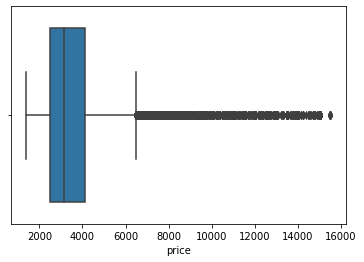

In [14]:
import seaborn as sns

sns.boxplot(df.price)

In [15]:
df.bedrooms.describe()

count   48,818
mean         2
std          1
min          0
25%          1
50%          1
75%          2
max          8
Name: bedrooms, dtype: float64

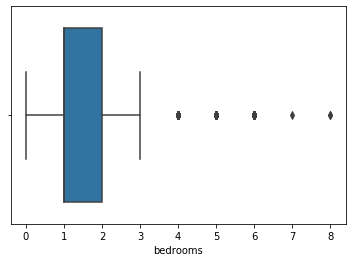

In [16]:
sns.boxplot(df.bedrooms)

In [0]:
#1 import linear regression model
from sklearn.linear_model import LinearRegression

In [0]:
#2 Instantiate this class
model1 = LinearRegression()

In [19]:
#3 Arrange x matrix & y target 
features = ['bedrooms']
target = 'price'
X = df[features]
y = df[target]

print(X.shape, y.shape)

(48818, 1) (48818,)


In [20]:
#4 Fit the model
model1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#5 Apply the model to new data
beds = 2
X_test = [[beds]]
y_pred = model1.predict(X_test)
print(f'Predicted price for a room with {beds} number of beds for a Tribeca apartment: {y_pred[0]}')

Predicted price for a room with 2 number of beds for a Tribeca apartment: 3974.482484232912


In [0]:
y_test = [[3580]]

In [0]:
from sklearn.metrics import mean_absolute_error

In [24]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Out models error: {mae}')

Out models error: 394.48248423291216


In [0]:
def price_pred_beds(beds):
  model = LinearRegression()
  feature = ['bedrooms']
  target = 'price'
  X = df[feature]
  y = df[target]
  model.fit(X,y)
  X_test = [[beds]]
  y_pred = model.predict(X_test)
  print(f'Predicted price for a room with {beds} number of beds for a Tribeca apartment: {y_pred[0]} dollars')
  y_test = [3580]
  mae = mean_absolute_error(y_test, y_pred)
  print(f'Out models error based on the mean absolute error of our guess using the mean is: {mae} dollars')



In [26]:
predicted_price = price_pred_beds(4)
predicted_price

Predicted price for a room with 4 number of beds for a Tribeca apartment: 5680.990819287774 dollars
Out models error based on the mean absolute error of our guess using the mean is: 2100.990819287774 dollars


# can we do mulitple features?

- YES WE CAN!

In [0]:
def price_pred_bb(beds, baths):
  model_bb = LinearRegression()
  feature_bb = ['bedrooms', 'bathrooms']
  target_bb = 'price'
  X_bb = df[feature_bb]
  y_bb = df[target_bb]
  model_bb.fit(X_bb,y_bb)
  X_test_bb = [[beds, baths]]
  y_pred_bb = model_bb.predict(X_test_bb)
  print(f'Predicted price for a room with {beds} number of beds and {baths} number of baths for a Tribeca apartment: {y_pred_bb[0]} dollars')

In [36]:
pred_bb_price = price_pred_bb(4,2)
pred_bb_price

Predicted price for a room with 4 number of beds and 2 number of baths for a Tribeca apartment: 6203.523099833408 dollars


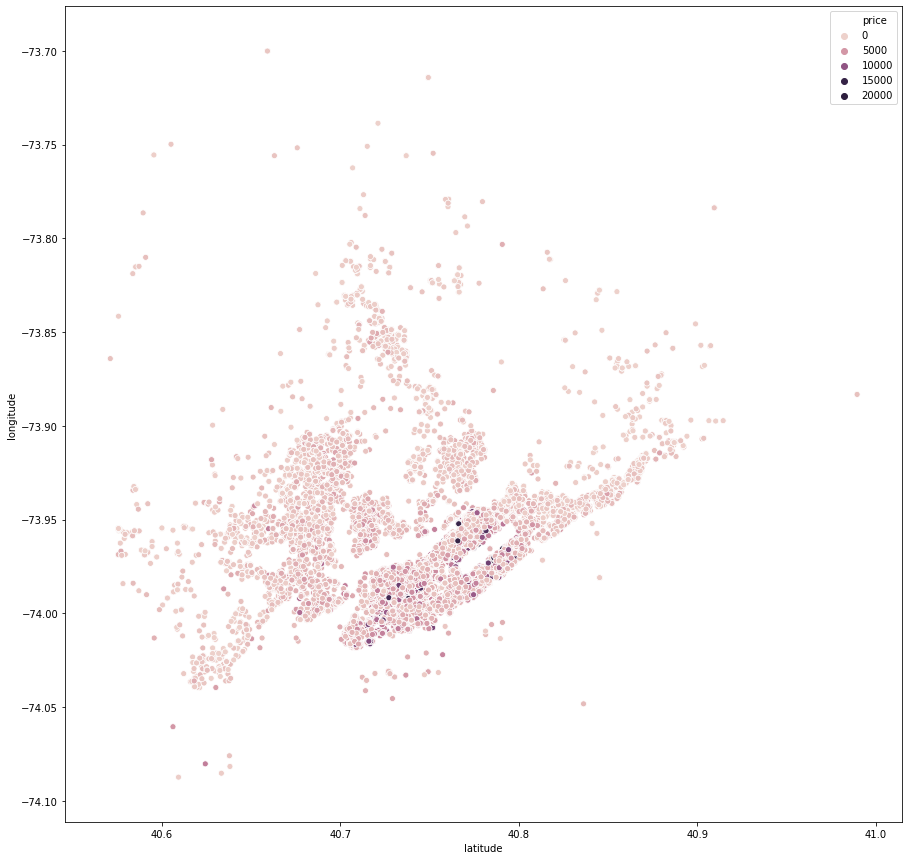

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.scatterplot(x='latitude', y='longitude', hue = 'price', data = df)